In [2]:
import fes
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import argparse
import pandas as pd
import xarray as xr

In [3]:
os.environ['FES_DATA'] = '/home/angel/tools/fes-2.9.1-Source/data/fes2014'
configuration_file = "/home/angel/tools/fes-2.9.1-Source/data/fes2014/ocean_tide.ini"

In [4]:
short_tide = fes.Handler("ocean", "io", configuration_file)
radial_tide = fes.Handler("radial", "io","/home/angel/tools/fes-2.9.1-Source/data/fes2014/load_tide.ini")

In [7]:
lat = np.arange(61, 69, 0.03)
lon = np.arange(-28, -10, (28-10)/lat.size)
assert lon.shape == lat.shape
size = lat.size
lons, lats = np.meshgrid(lon, lat)
dates = np.empty(lons.shape, dtype='datetime64[us]')

Running time 0


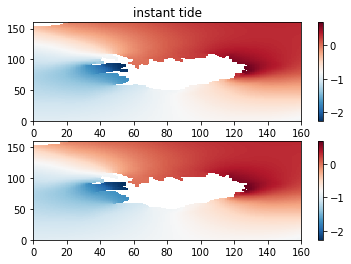

Running time 1


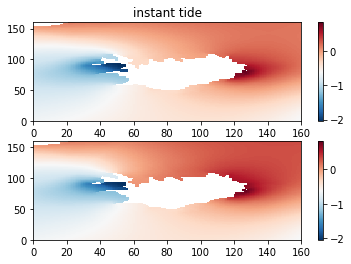

Running time 2


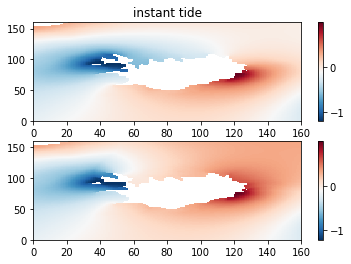

Running time 3


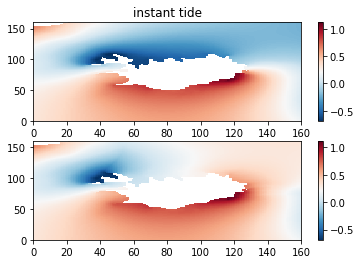

In [24]:
dummy_geo_tide = np.zeros((size,size))
dummy_geo_tide[:] = np.nan
for hh in range(0, 4):
    print("Running time %d" % (hh))
    d0 = datetime.datetime(2018, 1, 1,0,0)
    date = datetime.timedelta(hours=hh)+d0
    #datetime.datetime(2019, 8, 16, hh, 0)
    step = datetime.timedelta(seconds=3600)
    dates.fill(date)
    tide, lp = short_tide.vector(
    lats.ravel(), lons.ravel(), dates.ravel())
    if radial_tide is not None:
        load, load_lp = radial_tide.vector(
            lats.ravel(), lons.ravel(), dates.ravel())
    else:
        load = np.zeros((size * size))
        load_lp = load
    geo_tide = (tide + lp + load) * 0.01
    geo_tide = geo_tide.reshape((size, size))
    
    
    plt.subplot(2, 1, 1)
    plt.pcolor(geo_tide, cmap='RdBu_r')
    plt.title('instant tide')
    # set the limits of the plot to the limits of the data
    plt.colorbar()
    
#    plt.pcolormesh(geo_tide)
#    plt.show()
    mm_geo_tide = np.fmax(geo_tide,dummy_geo_tide)
    dummy_geo_tide = mm_geo_tide
    plt.subplot(2, 1, 2)
    plt.pcolor(mm_geo_tide, cmap='RdBu_r')
  #  plt.title('max accumulated')
    # set the limits of the plot to the limits of the data
    plt.colorbar()
    plt.show()

In [18]:
x=np.reshape(lons,(size*size,1))
y=np.reshape(lats,(size*size,1))
z=np.reshape(mm_geo_tide,(size*size,1))

In [19]:
pwd

'/home/angel/tools/fes2014/libfes-2.9.0/python/examples'

In [20]:
f = open('max_tide.xys','w')

In [21]:
f.close()

In [22]:
np.savetxt('max_tide.txt', np.c_[x,y,z], delimiter="\t")